# Ages and Heights Model

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# !wget "https://archive.org/download/ages-and-heights/AgesAndHeights.pkl"

In [4]:
data = pd.read_pickle("AgesAndHeights.pkl")

In [5]:
data.sample(5)

,Age,Height
65,7.801323,41.576479
81,11.129608,50.948708
8,7.356691,44.793065
42,5.020210,37.439030
40,4.805291,39.665424


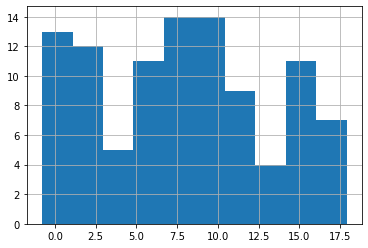

In [6]:
data.Age.hist();

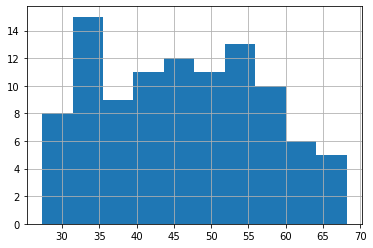

In [7]:
data.Height.hist();

### Convert inches to cm

In [8]:
data["Height_cm"] = data["Height"] * 2.54

In [9]:
data.sample(5)

,Age,Height,Height_cm
99,13.117413,55.177407,140.150615
69,11.771255,53.453691,135.772375
42,5.020210,37.439030,95.095136
78,8.196215,47.332750,120.225184
44,5.202815,38.099289,96.772195


### Remove ages < 0

In [10]:
ages = data.Age
heights = data.Height_cm

In [11]:
data[ages < 0]

,Age,Height,Height_cm
13,-0.163532,28.647834,72.765498
20,-0.683017,29.883928,75.905178
25,-0.146392,32.830922,83.390541
30,-0.780853,31.960807,81.180451
36,-0.087958,27.332513,69.424584
59,-0.548488,30.801346,78.235420
91,-0.328780,27.819052,70.660393


In [12]:
data = data[ages > 0]

In [13]:
data

,Age,Height,Height_cm
0,14.767874,59.627484,151.453810
1,3.107671,36.146453,91.811990
2,7.266917,46.912878,119.158711
3,1.815180,29.125660,73.979176
4,16.753758,68.170414,173.152851
...,...,...,...
95,7.323712,46.857505,119.018064
96,5.591509,39.339990,99.923574
97,2.625606,32.918925,83.614069
98,5.519293,40.704154,103.388552


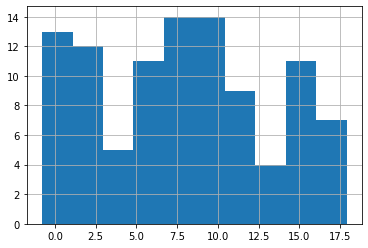

In [14]:
ages.hist();

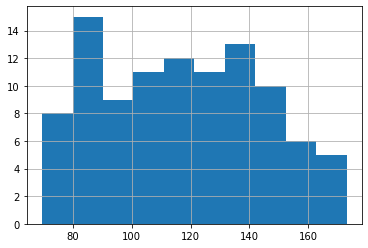

In [15]:
heights.hist();

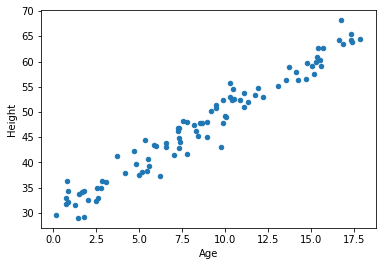

In [16]:
data.plot.scatter(x="Age", y="Height");

In [17]:
# Plotly graph

fig = px.scatter(data_frame=data, x="Age", y="Height_cm", 
                title="Height vs. Age", 
                labels={'Age':'Ages (years)', 'Height_cm':'Height (cm)'})
fig.show()

### Numpy arrays

In [18]:
ages_np = data.Age.to_numpy()
heights_np = data.Height_cm.to_numpy()

In [20]:
ages_np_reshaped = ages_np.reshape(len(ages_np), 1)

In [21]:
ages_np_reshaped[:10]

array([[14.76787382],
       [ 3.10767135],
       [ 7.26691701],
       [ 1.81517968],
       [16.75375763],
       [ 5.35126307],
       [ 8.65571488],
       [ 4.20599293],
       [ 7.35669106],
       [ 1.66817819]])

In [22]:
heights_np[:10]

array([151.45381001,  91.81198996, 119.15871128,  73.97917577,
       173.1528513 , 112.63976717, 121.19257688,  96.08805799,
       113.7743854 ,  86.50989723])

### Model

In [23]:
model = LinearRegression().fit(ages_np_reshaped, heights_np)

In [24]:
model.coef_

# Increase in height by year.

array([5.08359892])

In [25]:
model.intercept_

76.1031183411242

In [98]:
x_new = np.array(list(range(19))).reshape(19, 1)
preds = model.predict(x_new)

fig = px.scatter(data_frame=data, x="Age", y="Height_cm", 
                title="Height vs. Age", 
                labels={'Age':'Ages (years)', 'Height_cm':'Height (cm)'})

fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))
fig.write_image('base-pic.svg', width=800)
fig.show()

## Save model to file

In [27]:
from joblib import dump, load

In [28]:
dump(model, 'model.joblib')

['model.joblib']

In [29]:
model_in = load('model.joblib')
model_in.predict(np.array([[4]]))

array([96.43751403])

## Making Functions

In [30]:
def make_picture(training_data_filename, model, new_input_np, output_file='plot.svg'):
    data = pd.read_pickle(training_data_filename)
    data["Height_cm"] = data["Height"] * 2.54

    data = data[data.Age > 0]

    x_new = np.array(list(range(19))).reshape(19, 1)
    preds = model.predict(x_new)

    fig = px.scatter(data_frame=data, x="Age", y="Height_cm", 
                    title="Height vs. Age", 
                    labels={'Age':'Ages (years)', 'Height_cm':'Height (cm)'})

    fig.add_trace(go.Scatter(x=x_new.reshape(19), y=preds, mode='lines', name='Model'))

    # add marker for new input

    new_preds = model.predict(new_input_np)
    fig.add_trace(go.Scatter(x=new_input_np.reshape(len(new_input_np)), y=new_preds, name="New Output", mode='markers', marker=dict(color='purple', size=16)))

    fig.write_image(output_file, width=800)
    fig.show()

In [31]:
make_picture('AgesAndHeights.pkl', model_in, np.array([[2], [17]]))

In [92]:
def floats_str_to_np_array(floats_str):
    def is_float(s):
        try:
            float(s)
            return True
        except:
            return False

    floats = np.array([float(x) for x in floats_str.split(',') if is_float(x)])
    return floats.reshape(len(floats), 1)


In [93]:
floats_str_to_np_array(', ,, , , 2.2,,, sdfas;dkl;ads;afkjsa;f,              1.8,.9,          , , , , ,,,,')

array([[2.2],
       [1.8],
       [0.9]])

In [97]:
make_picture('AgesAndHeights.pkl', model_in, floats_str_to_np_array(' 5,, , , ,,,,'))